<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Naruto_Characters_Classification/blob/main/Naruto_Characters_Classification_Pilot_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naruto Characters Classification Pilot Project

**This is a test project to learn and gather all the pieces/ skills required to complete the full project.**

*The **Naruto Characters Classification Project** is a multi class classification project.  
The total number of classes for the project are not yet known.*  

This pilot project is aimed to check the viability of the complete project and to acquire the skills required for the completion of the full project.  

This Pilot Project is being made using **3 classes**:
1.   Naruto_Uzumaki
2.   Sakura_Haruno
3.   Sasuke_Uchiha



## Concerns
#### Concern 1 : There are multiple similar images in each class these need to be filtered out in order to avoid a bias.

##### Solution : Done for Naruto, Sakura and Sasuke images.  
  
  
#### Concern 2 : There is a need to manually edit the images in order to remove the labels or unrelated information on the image.

##### Solution : Done for Naruto, Sakura and Sasuke images.  
    
#### Concern 3 : There is a need to create labels of the images and save them as a separate labels file.  
##### Solution : Task 6
#### Concern 4 : There is a need to convert the 4 channel PNG images to 3 channel images [RBGA to RBG]. 
##### Solution : Task 3  
**This is not necessary if making own CNN because CNN can take any size input but if using transfer learning 3 channels might be required since most of the premade models only accept a 3 channel input**
#### Concern 5 : There is a need to standardize the shape (i.e. the image width and height) of all the images.



## Important Notes
#### Note 1 : There are two ways to load images for the project


1. Create 2 folders one for test and another for train data and inside each of them have separate folders for images belonging to each class. This method uses ImageDataGenerator.flow_from_directory() to perform on the spot data augmentation and you don't need to provide a separate train and test label file.
2.   Create a single folder and put all the data in it. Make a separate file with image names and labels. Now read the data using the labels file and afterwards create a train_test_split. In this method we will use ImageDataGenerator.flow() to perform on the spot data augmentation.



In [1]:
# Check if GPU is running
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

## Task 1 : Reading an image

In [ ]:
img_1 = imread('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/Naruto_Uzumaki/Naruto_Uzumaki (1).png')

In [ ]:
img_2 = imread('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/Naruto_Uzumaki/Naruto_Uzumaki (18).png')

In [ ]:
img_3 = imread('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/Sasuke_Uchiha/Sasuke_Uchiha (1).png')

## Task 2 : Visualizing an image

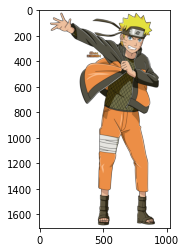

In [ ]:
plt.imshow(img_1)

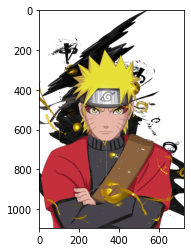

In [ ]:
plt.imshow(img_2)

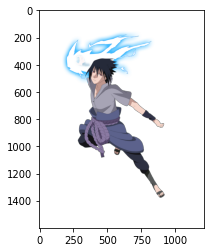

In [ ]:
plt.imshow(img_3)

In [ ]:
img_1.shape, img_2.shape, img_3.shape

((1707, 1024, 4), (1095, 729, 4), (1600, 1214, 4))

## Task 3 : Converting 4 channel images to 3 channel

**Dealing with Concern 4.**  
**This is not necessary if making own CNN because CNN can take any size input but if using transfer learning 3 channels might be required since most of the premade models only accept a 3 channel input**

To look for 4 channel images in the dataset and convert the ones with 4 channels to 3 channel ones
```
# In case of grayScale images the len(img.shape) == 2
if len(img.shape) > 2 and img.shape[2] == 4:
    #convert the image from RGBA2RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
```



In [ ]:
# # In case of grayScale images the len(img.shape) == 2
# if len(img.shape) > 2 and img.shape[2] == 4:
#     #convert the image from RGBA2RGB
#     img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

In [ ]:
 img_1_3c = cv2.cvtColor(img_1, cv2.COLOR_BGRA2BGR)

In [ ]:
img_1_3c.shape

(1707, 1024, 3)

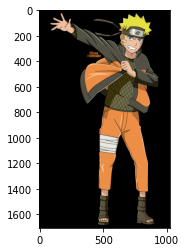

In [ ]:
plt.imshow(img_1_3c)

## Task 4 : Setting up file paths

In [ ]:
dir_path = '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset'

In [ ]:
os.listdir(dir_path)

['Naruto_Uzumaki', 'Sasuke_Uchiha', 'Sakura_Haruno']

In [ ]:
os.listdir(dir_path+'/Sakura_Haruno')[0]

'Sakura_Haruno (56).png'

In [ ]:
sakura_path = dir_path+'/Sakura_Haruno/'

In [ ]:
test_path_sakura = sakura_path+'Sakura_Haruno (56).png'

In [ ]:
test_image_sakura = plt.imread(test_path_sakura)

In [ ]:
test_image_sakura.shape

(660, 440, 4)

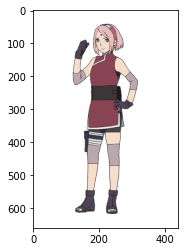

In [ ]:
plt.imshow(test_image_sakura)

## Task 5 : Check the range of image sizes and channels

In [ ]:
# To check the distribution of image sizes
dim_1_sakura = []
dim_2_sakura = []
channels_sakura = []
for image_paths in os.listdir(sakura_path):
  dim_1, dim_2, channels = imread(sakura_path+image_paths).shape
  dim_1_sakura.append(dim_1)
  dim_2_sakura.append(dim_2)
  channels_sakura.append(channels)

In [ ]:
np.mean(dim_1_sakura), np.mean(dim_2_sakura)

(1744.546875, 1006.5625)

In [ ]:
np.std(dim_1_sakura), np.std(dim_2_sakura)

(1068.9039206368057, 573.6107367751671)

In [ ]:
pd.Series(dim_1_sakura).nunique(), pd.Series(dim_2_sakura).nunique(),pd.Series(channels_sakura).nunique()

(55, 49, 1)

In [ ]:
np.min(channels_sakura), np.max(channels_sakura)

(4, 4)

In [ ]:
np.min(dim_1_sakura), np.max(dim_1_sakura)

(512, 5000)

In [ ]:
np.min(dim_2_sakura), np.max(dim_2_sakura)

(349, 2500)

### Inference


*   This shows that there are many different image sizes and they are also distributed over a wide range.
*   This also shows that all the images in the folder have 4 channels and need to be converted to 3 channels.



## Task 6 : Create a label file

> CAUTION : DONOT RUN THIS TASK MULTIPLE TIMES TO AVOID UNWANTED SHUFFLING OF THE DATA LABELS FILE

In [ ]:
sakura_path = dir_path+'/Sakura_Haruno_Selected/'

In [ ]:
sasuke_path = dir_path+'/Sasuke_Uchiha_Selected/'

In [ ]:
naruto_path = dir_path + '/Naruto_Uzumaki_Selected/'

In [ ]:
# dataframe that will store image names and labels
df = pd.DataFrame(columns = ['image_name', 'character_label'])

In [ ]:
df

,image_name,character_label


In [ ]:
# Add Naruto image names and labels to dataframe
i = 0
for image_name in os.listdir(naruto_path):
  df.loc[i,'image_name'] = image_name
  df.loc[i, 'character_label'] = 'Naruto_Uzumaki'
  i+=1

In [ ]:
df.head()

,image_name,character_label
0,Naruto_Uzumaki (17).png,Naruto_Uzumaki
1,Naruto_Uzumaki (18).png,Naruto_Uzumaki
2,Naruto_Uzumaki (16).png,Naruto_Uzumaki
3,Naruto_Uzumaki (15).png,Naruto_Uzumaki
4,Naruto_Uzumaki (13).png,Naruto_Uzumaki


In [ ]:
# Add Sasuke image names and labels to dataframe
print(i)
for image_name in os.listdir(sasuke_path):
  df.loc[i,'image_name'] = image_name
  df.loc[i, 'character_label'] = 'Sasuke_Uchiha'
  i+=1

61


In [ ]:
df.head()

,image_name,character_label
0,Naruto_Uzumaki (17).png,Naruto_Uzumaki
1,Naruto_Uzumaki (18).png,Naruto_Uzumaki
2,Naruto_Uzumaki (16).png,Naruto_Uzumaki
3,Naruto_Uzumaki (15).png,Naruto_Uzumaki
4,Naruto_Uzumaki (13).png,Naruto_Uzumaki


In [ ]:
# Add Sakura image names and labels to dataframe
print(i)
for image_name in os.listdir(sakura_path):
  df.loc[i,'image_name'] = image_name
  df.loc[i, 'character_label'] = 'Sakura_Haruno'
  i+=1

119


In [ ]:
df.head()

,image_name,character_label
0,Naruto_Uzumaki (17).png,Naruto_Uzumaki
1,Naruto_Uzumaki (18).png,Naruto_Uzumaki
2,Naruto_Uzumaki (16).png,Naruto_Uzumaki
3,Naruto_Uzumaki (15).png,Naruto_Uzumaki
4,Naruto_Uzumaki (13).png,Naruto_Uzumaki


In [ ]:
len(os.listdir(sakura_path))+len(os.listdir(sasuke_path))+len(os.listdir(naruto_path))

176

In [ ]:
i

176

In [ ]:
# To shuffle the labels in order to avoid any bias
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,image_name,character_label
0,Sasuke_Uchiha (20).png,Sasuke_Uchiha
1,Sakura_Haruno (32).png,Sakura_Haruno
2,Sakura_Haruno (15).png,Sakura_Haruno
3,Sakura_Haruno (28).png,Sakura_Haruno
4,Naruto_Uzumaki (41).png,Naruto_Uzumaki


In [ ]:
# CAUTION : THE BELOW LINE HAS BEEN COMMENTED OUT TO PREVENT UNWANTED OVERWRITING OF LABELS FILE
# df.to_csv('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/selected_labels.csv', index = False)

## Task 7 : Image Manipulation

Its usually a good idea to augment the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the `ImageDataGenerator` to do this.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

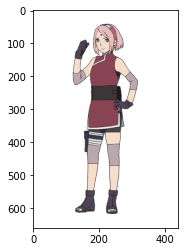

In [ ]:
plt.imshow(test_image_sakura)

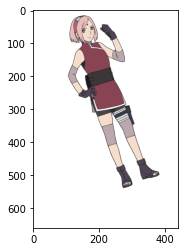

In [ ]:
plt.imshow(image_gen.random_transform(test_image_sakura))

## Task 8 : Combining all the work

### Setting paths of directories

In [2]:
pilot_train_path = '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/Pilot_Train/'
pilot_test_path = '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/Pilot_Test/'
pilot_all_in_one_path = '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/Pilot_All_in_One/'

### Checking the average dimentions and channels of images

In [3]:
# To check the distribution of image sizes
dim_1_all = []
dim_2_all = []
channels_all = []
for image_path in os.listdir(pilot_all_in_one_path):
  dim_1, dim_2, channels = imread(pilot_all_in_one_path+image_path).shape
  dim_1_all.append(dim_1)
  dim_2_all.append(dim_2)
  channels_all.append(channels)
  if(channels == 3):
    print(image_path)

NameError: ignored

In [ ]:
np.mean(dim_1_all), np.mean(dim_2_all)

In [ ]:
np.std(dim_1_all), np.std(dim_2_all)

In [ ]:
pd.Series(dim_1_all).nunique(), pd.Series(dim_2_all).nunique(),pd.Series(channels_all).nunique()

In [4]:
np.min(channels_all), np.max(channels_all)

NameError: ignored

In [ ]:
pd.Series(channels_all).value_counts()

In [ ]:
np.min(dim_1_all), np.max(dim_1_all)

In [ ]:
np.min(dim_2_all), np.max(dim_2_all)

### Inference


*   This shows that there are many different image sizes and they are also distributed over a wide range hence, need to be resized.
*   There are images with both 3 and 4 channels(3 channel images removed for now) and need to be converted to 3 channels.



### Setting an input shape

In [5]:
image_shape = (1260, 840, 4)

### Creating an `ImageDataGenerator` for on the spot data augmentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

### Creating a CNN model

### Defining callbacks

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
early_stop = EarlyStopping(monitor='val_loss',patience=7)

In [9]:
from keras.callbacks import CSVLogger


In [10]:
# different csv_logger for each model
# csv_logger = CSVLogger("/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/model_1_history_log.csv", append=True)

### Training the Model

In [11]:
batch_size = 16

In [12]:
train_image_gen = image_gen.flow_from_directory(pilot_train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgba',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 145 images belonging to 3 classes.


In [13]:
test_image_gen = image_gen.flow_from_directory(pilot_test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgba',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle = False)

Found 30 images belonging to 3 classes.


In [14]:
train_image_gen.class_indices

{'Naruto_Uzumaki': 0, 'Sakura_Haruno': 1, 'Sasuke_Uchiha': 2}

In [15]:
test_image_gen.class_indices

{'Naruto_Uzumaki': 0, 'Sakura_Haruno': 1, 'Sasuke_Uchiha': 2}

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation

In [23]:
# Create a Sequential model
model_1 = Sequential()

# Add Layers to the model

# Convolution_Layer_1
model_1.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution_Layer_2
model_1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 40% of neurons.
model_1.add(Dropout(0.3))

# Convolution_Layer_3
model_1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model_1.add(MaxPooling2D(pool_size=(2, 2)))


# Convolution_Layer_4
model_1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.3))

# Flattening_Layer
model_1.add(Flatten())

# Dense_Layer_1
model_1.add(Dense(256))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.3))

# Dense_Layer_2
model_1.add(Dense(128))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.3))



# Last layer uses softmax activation since we are doing a multi class classification
model_1.add(Dense(3))
model_1.add(Activation('softmax'))

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1258, 838, 32)     1184      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 629, 419, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 627, 417, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 313, 208, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 313, 208, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 311, 206, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 155, 103, 128)     0

In [25]:
csv_logger_1 = CSVLogger("/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/re_model_1_history_log.csv", append=True)

In [26]:
results_1 = model_1.fit(train_image_gen,epochs=50,
                              validation_data=test_image_gen,
                             callbacks=[early_stop, csv_logger_1])

Epoch 1/50
10/10 [==============================] - 179s 14s/step - loss: 5.8823 - accuracy: 0.2919 - val_loss: 1.0890 - val_accuracy: 0.3333
Epoch 2/50
10/10 [==============================] - 62s 6s/step - loss: 1.0548 - accuracy: 0.3135 - val_loss: 0.9477 - val_accuracy: 0.3333
Epoch 3/50
10/10 [==============================] - 68s 7s/step - loss: 0.9213 - accuracy: 0.5014 - val_loss: 0.8437 - val_accuracy: 0.6000
Epoch 4/50
10/10 [==============================] - 72s 7s/step - loss: 0.8241 - accuracy: 0.6644 - val_loss: 0.8367 - val_accuracy: 0.6333
Epoch 5/50
10/10 [==============================] - 73s 7s/step - loss: 0.8067 - accuracy: 0.6163 - val_loss: 0.7954 - val_accuracy: 0.6667
Epoch 6/50
10/10 [==============================] - 72s 7s/step - loss: 0.9355 - accuracy: 0.5110 - val_loss: 1.0849 - val_accuracy: 0.3667
Epoch 7/50
10/10 [==============================] - 70s 7s/step - loss: 1.0443 - accuracy: 0.4017 - val_loss: 0.7766 - val_accuracy: 0.6667
Epoch 8/50
10/10 [

In [ ]:
from tensorflow.keras.models import load_model
model_1.save('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/re_pilot_model_1.h5')

In [17]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model_2 = Sequential()

model_2.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model_2.add(MaxPooling2D(pool_size=(2, 2)))


model_2.add(Flatten())


model_2.add(Dense(128))
model_2.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model_2.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model_2.add(Dense(3))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
#@title
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1258, 838, 32)     1184      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 629, 419, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 627, 417, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 313, 208, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 311, 206, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 155, 103, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1021760)           0

In [19]:
#@title
image_shape

(1260, 840, 4)

In [20]:
#@title

csv_logger_2 = CSVLogger("/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/re_model_2_history_log.csv", append=True)

In [21]:
results = model_2.fit(train_image_gen,epochs=40,
                    validation_data=test_image_gen,
                    callbacks=[early_stop, csv_logger_2])

Epoch 1/40
10/10 [==============================] - 172s 14s/step - loss: 9.9762 - accuracy: 0.3183 - val_loss: 1.0299 - val_accuracy: 0.4000
Epoch 2/40
10/10 [==============================] - 62s 6s/step - loss: 1.0919 - accuracy: 0.3433 - val_loss: 1.0782 - val_accuracy: 0.5000
Epoch 3/40
10/10 [==============================] - 61s 6s/step - loss: 1.0693 - accuracy: 0.3883 - val_loss: 1.0158 - val_accuracy: 0.5000
Epoch 4/40
10/10 [==============================] - 60s 6s/step - loss: 0.9787 - accuracy: 0.6291 - val_loss: 0.9444 - val_accuracy: 0.6333
Epoch 5/40
10/10 [==============================] - 61s 6s/step - loss: 0.9410 - accuracy: 0.6230 - val_loss: 0.7993 - val_accuracy: 0.6667
Epoch 6/40
10/10 [==============================] - 61s 6s/step - loss: 0.6450 - accuracy: 0.7805 - val_loss: 0.9356 - val_accuracy: 0.8000
Epoch 7/40
10/10 [==============================] - 61s 6s/step - loss: 0.5699 - accuracy: 0.8039 - val_loss: 0.7154 - val_accuracy: 0.8000
Epoch 8/40
10/10 [

In [22]:
#@title
from tensorflow.keras.models import load_model
model_2.save('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/re_pilot_model_2.h5')

In [53]:
#@title
# Create a Sequential model
model_3 = Sequential()

# Add Layers to the model

# Convolution_Layer_1
model_3.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution_Layer_2
model_3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution_Layer_3
model_3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model_3.add(MaxPooling2D(pool_size=(2, 2)))


# Convolution_Layer_4
model_3.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening_Layer
model_3.add(Flatten())

# Dense_Layer_1
model_3.add(Dense(256))
model_3.add(Activation('relu'))


# Dense_Layer_2
model_3.add(Dense(128))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.3))



# Last layer uses softmax activation since we are doing a multi class classification
model_3.add(Dense(3))
model_3.add(Activation('softmax'))

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
#@title
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 1258, 838, 32)     1184      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 629, 419, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 627, 417, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 313, 208, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 311, 206, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 155, 103, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 153, 101, 128)    

In [55]:
#@title
csv_logger_3 = CSVLogger("/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/re_model_3_history_log.csv", append=True)

In [56]:
results = model_3.fit(train_image_gen,epochs=40,
                    validation_data=test_image_gen,
                    callbacks=[early_stop, csv_logger_3])

Epoch 1/40
10/10 [==============================] - 67s 7s/step - loss: 5.0349 - accuracy: 0.2578 - val_loss: 1.2189 - val_accuracy: 0.3333
Epoch 2/40
10/10 [==============================] - 60s 6s/step - loss: 1.1203 - accuracy: 0.4108 - val_loss: 1.0365 - val_accuracy: 0.4667
Epoch 3/40
10/10 [==============================] - 61s 6s/step - loss: 1.0285 - accuracy: 0.4881 - val_loss: 1.0254 - val_accuracy: 0.4000
Epoch 4/40
10/10 [==============================] - 60s 6s/step - loss: 1.0429 - accuracy: 0.5049 - val_loss: 0.9410 - val_accuracy: 0.4667
Epoch 5/40
10/10 [==============================] - 61s 6s/step - loss: 0.9067 - accuracy: 0.4923 - val_loss: 0.7420 - val_accuracy: 0.5667
Epoch 6/40
10/10 [==============================] - 61s 7s/step - loss: 1.0414 - accuracy: 0.5377 - val_loss: 0.7347 - val_accuracy: 0.8667
Epoch 7/40
10/10 [==============================] - 61s 6s/step - loss: 0.7133 - accuracy: 0.7595 - val_loss: 0.8948 - val_accuracy: 0.5333
Epoch 8/40
10/10 [==

In [57]:
#@title
model_3.save('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/re_pilot_model_3.h5')

In [ ]:
# Edited model_1
# model_4

# Create a Sequential model
model_4 = Sequential()

# Add Layers to the model

# Convolution_Layer_1
model_4.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution_Layer_2
model_4.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution_Layer_3
model_4.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model_4.add(MaxPooling2D(pool_size=(2, 2)))


# Convolution_Layer_4
model_4.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening_Layer
model_4.add(Flatten())

# Dense_Layer_1
model_4.add(Dense(256))
model_4.add(Activation('relu'))


# Last layer uses softmax activation since we are doing a multi class classification
model_4.add(Dense(3))
model_4.add(Activation('softmax'))

model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 1258, 838, 32)     1184      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 629, 419, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 627, 417, 64)      18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 313, 208, 64)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 311, 206, 128)     73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 155, 103, 128)     0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 153, 101, 128)    

In [ ]:
csv_logger_4 = CSVLogger("/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/model_4_history_log.csv", append=True)

In [ ]:
results = model_4.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    callbacks=[early_stop, csv_logger_4])

Epoch 1/50
10/10 [==============================] - 65s 7s/step - loss: 7.6934 - accuracy: 0.3138 - val_loss: 1.0984 - val_accuracy: 0.4333
Epoch 2/50
10/10 [==============================] - 60s 6s/step - loss: 1.0986 - accuracy: 0.3637 - val_loss: 1.0971 - val_accuracy: 0.3333
Epoch 3/50
10/10 [==============================] - 59s 6s/step - loss: 1.0953 - accuracy: 0.3220 - val_loss: 1.0683 - val_accuracy: 0.4000
Epoch 4/50
10/10 [==============================] - 59s 6s/step - loss: 1.1073 - accuracy: 0.3912 - val_loss: 1.0972 - val_accuracy: 0.3333
Epoch 5/50
10/10 [==============================] - 59s 6s/step - loss: 1.0986 - accuracy: 0.3261 - val_loss: 1.0986 - val_accuracy: 0.3000
Epoch 6/50
10/10 [==============================] - 59s 6s/step - loss: 1.0986 - accuracy: 0.2974 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 7/50
10/10 [==============================] - 59s 6s/step - loss: 1.0987 - accuracy: 0.3161 - val_loss: 1.0984 - val_accuracy: 0.3333
Epoch 8/50
10/10 [==

In [ ]:
model_4.save('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_model_4.h5')

In [ ]:
# Create a Sequential model
model_5 = Sequential()

# Add Layers to the model

# Convolution_Layer_1
model_5.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model_5.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution_Layer_2
model_5.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model_5.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution_Layer_3
model_5.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model_5.add(MaxPooling2D(pool_size=(2, 2)))


# Convolution_Layer_4
model_5.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model_5.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening_Layer
model_5.add(Flatten())

# Dense_Layer_1
model_5.add(Dense(256))
model_5.add(Activation('relu'))


# Dense_Layer_2
model_5.add(Dense(128))
model_5.add(Activation('relu'))
model_5.add(Dropout(0.3))



# Last layer uses softmax activation since we are doing a multi class classification
model_5.add(Dense(3))
model_5.add(Activation('softmax'))

model_5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 1258, 838, 32)     1184      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 629, 419, 32)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 627, 417, 64)      18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 313, 208, 64)      0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 311, 206, 64)      36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 155, 103, 64)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 153, 101, 128)    

In [ ]:
csv_logger_5 = CSVLogger("/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/model_5_WES_history_log.csv", append=True)

In [ ]:
results = model_5.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    callbacks=[csv_logger_5])

Epoch 1/50
10/10 [==============================] - 65s 7s/step - loss: 6.9712 - accuracy: 0.4785 - val_loss: 1.0345 - val_accuracy: 0.6000
Epoch 2/50
10/10 [==============================] - 58s 6s/step - loss: 1.0854 - accuracy: 0.3304 - val_loss: 0.9924 - val_accuracy: 0.4000
Epoch 3/50
10/10 [==============================] - 58s 6s/step - loss: 0.9196 - accuracy: 0.5948 - val_loss: 1.1689 - val_accuracy: 0.4000
Epoch 4/50
10/10 [==============================] - 58s 6s/step - loss: 1.1484 - accuracy: 0.4378 - val_loss: 1.0579 - val_accuracy: 0.4000
Epoch 5/50
10/10 [==============================] - 59s 6s/step - loss: 1.0867 - accuracy: 0.4251 - val_loss: 0.9362 - val_accuracy: 0.4667
Epoch 6/50
10/10 [==============================] - 58s 6s/step - loss: 0.9048 - accuracy: 0.4974 - val_loss: 0.9253 - val_accuracy: 0.6000
Epoch 7/50
10/10 [==============================] - 58s 6s/step - loss: 0.6835 - accuracy: 0.7330 - val_loss: 0.8217 - val_accuracy: 0.7000
Epoch 8/50
10/10 [==

In [ ]:
model_5.save('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_model_5_WES.h5')

In [ ]:
# Create a Sequential model
model_6 = Sequential()

# Add Layers to the model

# Convolution_Layer_1
model_6.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model_6.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution_Layer_2
model_6.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model_6.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution_Layer_3
model_6.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model_6.add(MaxPooling2D(pool_size=(2, 2)))


# Convolution_Layer_4
model_6.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model_6.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution_Layer_5
model_6.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model_6.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening_Layer
model_6.add(Flatten())

# Dense_Layer_1
model_6.add(Dense(256))
model_6.add(Activation('relu'))


# Dense_Layer_2
model_6.add(Dense(128))
model_6.add(Activation('relu'))
# model_6.add(Dropout(0.3))



# Last layer uses softmax activation since we are doing a multi class classification
model_6.add(Dense(3))
model_6.add(Activation('softmax'))

model_6.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_6.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 1258, 838, 32)     1184      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 629, 419, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 627, 417, 64)      18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 313, 208, 64)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 311, 206, 64)      36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 155, 103, 64)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 153, 101, 128)    

In [ ]:
csv_logger_6 = CSVLogger("/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/model_6_history_log.csv", append=True)

In [ ]:
results = model_6.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    callbacks=[early_stop, csv_logger_6])

Epoch 1/50
10/10 [==============================] - 66s 7s/step - loss: 2.3063 - accuracy: 0.3972 - val_loss: 1.1220 - val_accuracy: 0.3333
Epoch 2/50
10/10 [==============================] - 58s 6s/step - loss: 1.0942 - accuracy: 0.3550 - val_loss: 1.0376 - val_accuracy: 0.5333
Epoch 3/50
10/10 [==============================] - 58s 6s/step - loss: 0.9552 - accuracy: 0.5505 - val_loss: 1.2145 - val_accuracy: 0.5667
Epoch 4/50
10/10 [==============================] - 58s 6s/step - loss: 0.9717 - accuracy: 0.5497 - val_loss: 0.8946 - val_accuracy: 0.3667
Epoch 5/50
10/10 [==============================] - 58s 6s/step - loss: 0.8290 - accuracy: 0.5334 - val_loss: 0.8945 - val_accuracy: 0.7000
Epoch 6/50
10/10 [==============================] - 58s 6s/step - loss: 0.7542 - accuracy: 0.7936 - val_loss: 0.7696 - val_accuracy: 0.7000
Epoch 7/50
10/10 [==============================] - 58s 6s/step - loss: 0.7112 - accuracy: 0.6968 - val_loss: 0.7952 - val_accuracy: 0.6333
Epoch 8/50
10/10 [==

In [ ]:
model_6.save('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_model_6.h5')

### Inference
#### The learning curve is not showing a uniform trend it is very unstable.
#### This might indicate some problems in out models.

### Solutions
#### Try using 'same' padding instead of valid.
#### 

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_1 = load_model('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_model_1.h5')
model_2 = load_model('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_model_2.h5')
# model_3 = load_model('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_model_3.h5')

In [ ]:
model_1_history = pd.read_csv('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/model_1_history_log.csv')
model_2_history = pd.read_csv('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/model_2_history_log.csv')
model_3_history = pd.read_csv('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/model_3_history_log.csv')

In [23]:
model_1_history = pd.read_csv('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/re_model_1_history_log.csv')

NameError: ignored

In [58]:
import pandas as pd

model_3_history = pd.read_csv('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/re_model_3_history_log.csv')


In [59]:
model_3_history.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.262069,3.535610,0.333333,1.218921
1,1,0.434483,1.089244,0.466667,1.036494
2,2,0.489655,1.020860,0.400000,1.025364
3,3,0.517241,1.014015,0.466667,0.941037
4,4,0.551724,0.875205,0.566667,0.741986


In [39]:
results.history['accuracy'][:5]

[0.35862070322036743,
 0.38620689511299133,
 0.4275861978530884,
 0.6137930750846863,
 0.6551724076271057]

# Evaluating the Model

In [ ]:
# import pandas as pd
# losses = pd.DataFrame(model.history.history)

In [ ]:
model_1.metrics_names

['loss', 'accuracy']

In [ ]:
model_1.evaluate(test_image_gen)

2/2 [==============================] - 10s 5s/step - loss: 0.3767 - accuracy: 0.9000


[0.37671026587486267, 0.8999999761581421]

In [60]:
model_3.evaluate(test_image_gen)

2/2 [==============================] - 10s 5s/step - loss: 0.4259 - accuracy: 0.8667


[0.42587289214134216, 0.8666666746139526]

In [ ]:
model_3.evaluate(test_image_gen)

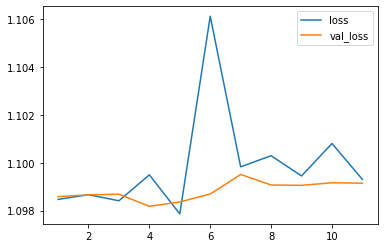

In [ ]:
model_1_history[['loss', 'val_loss']][1:].plot()

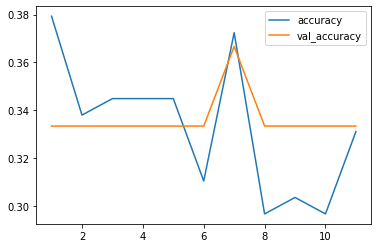

In [ ]:
model_1_history[['accuracy', 'val_accuracy']][1:].plot()

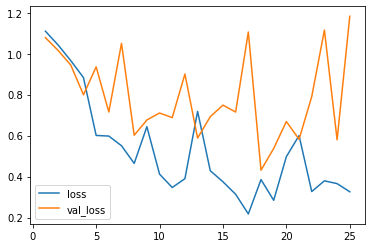

In [41]:
model_2_history[['loss', 'val_loss']][1:].plot()

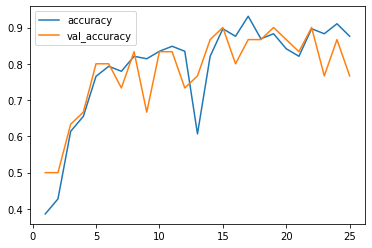

In [45]:
model_2_history[['accuracy', 'val_accuracy']][1:].plot()

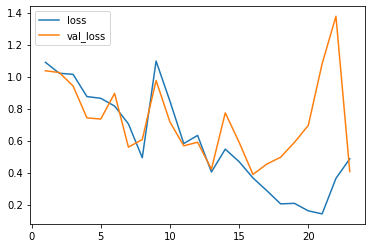

In [61]:
model_3_history[['loss', 'val_loss']][1:].plot()

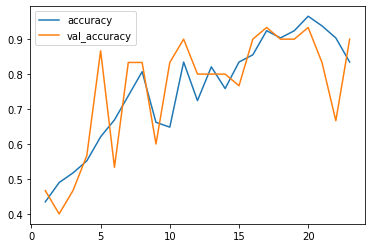

In [62]:
model_3_history[['accuracy', 'val_accuracy']][1:].plot()

In [ ]:
pred_prob_1 = model_1.predict(test_image_gen)

In [ ]:
pred_prob_1[:5]

array([[1.00000000e+00, 4.72262807e-09, 7.25720872e-10],
       [1.00000000e+00, 9.05519471e-15, 4.94761025e-13],
       [1.00000000e+00, 1.02315625e-22, 3.85559642e-22],
       [2.68925369e-01, 7.00328410e-01, 3.07462085e-02],
       [4.42357779e-01, 5.12232959e-01, 4.54092883e-02]], dtype=float32)

In [ ]:
import numpy as np
predicted_class_indices_1 = np.argmax(pred_prob_1,axis=1)

In [ ]:
predicted_class_indices_1[:5]

array([0, 0, 0, 1, 1])

In [63]:
pred_prob_3 = model_3.predict(test_image_gen)

In [64]:
pred_prob_3[:5]

array([[9.9926323e-01, 7.3659373e-04, 6.6504128e-08],
       [9.9980432e-01, 1.9573180e-04, 2.5468246e-08],
       [9.9999964e-01, 3.0153296e-07, 1.7379659e-14],
       [3.6187097e-01, 6.3722450e-01, 9.0455334e-04],
       [9.7372568e-01, 2.6233038e-02, 4.1203170e-05]], dtype=float32)

In [65]:
import numpy as np
predicted_class_indices_3 = np.argmax(pred_prob_3,axis=1)

In [66]:
predicted_class_indices_3[:5]

array([0, 0, 0, 1, 1])

In [ ]:
# Why do these give different results??
# model_2.predict_classes(test_image_gen)[:5]
# model_2.predict_generator(test_image_gen,verbose=1,steps=2)
# model_2.predict(test_image_gen)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
test_image_gen.classes, len(test_image_gen.classes)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], dtype=int32), 30)

In [ ]:
test_image_gen.class_indices

{'Naruto_Uzumaki': 0, 'Sakura_Haruno': 1, 'Sasuke_Uchiha': 2}

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes,predicted_class_indices_1))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.83      1.00      0.91        10
           2       0.91      1.00      0.95        10

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



In [ ]:
confusion_matrix(test_image_gen.classes,predicted_class_indices_1)

array([[ 7,  2,  1],
       [ 0, 10,  0],
       [ 0,  0, 10]])

In [67]:
print(classification_report(test_image_gen.classes,predicted_class_indices_3))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.90      0.90      0.90        10
           2       0.83      1.00      0.91        10

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



In [68]:
confusion_matrix(test_image_gen.classes,predicted_class_indices_3)

array([[ 8,  1,  1],
       [ 0,  9,  1],
       [ 0,  0, 10]])

# Model 3 worked the best giving 90% accuracy